# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    #city_url = f"{url}lat={lat}&lon={lon}&appid={api_key}"
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | crane
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | bargara
City not found. Skipping...
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | rio grande
Processing Record 9 of Set 1 | floro
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | soure
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | forster
Processing Record 19 of Set 1 | victoria point
Processing Record 20 of Set 1 | corum
Proc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,crane,31.3974,-102.3501,17.78,17,2,5.25,US,1711641138
1,hawaiian paradise park,19.5933,-154.9731,20.02,98,100,1.54,US,1711641138
2,whitehorse,60.7161,-135.0538,0.43,80,75,1.03,CA,1711641138
3,adamstown,-25.0660,-130.1015,24.60,74,63,6.97,PN,1711641138
4,puerto ayora,-0.7393,-90.3518,27.53,94,54,4.02,EC,1711641139


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,17.78,17,2,5.25,US,1711641138
1,hawaiian paradise park,19.5933,-154.9731,20.02,98,100,1.54,US,1711641138
2,whitehorse,60.7161,-135.0538,0.43,80,75,1.03,CA,1711641138
3,adamstown,-25.0660,-130.1015,24.60,74,63,6.97,PN,1711641138
4,puerto ayora,-0.7393,-90.3518,27.53,94,54,4.02,EC,1711641139


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

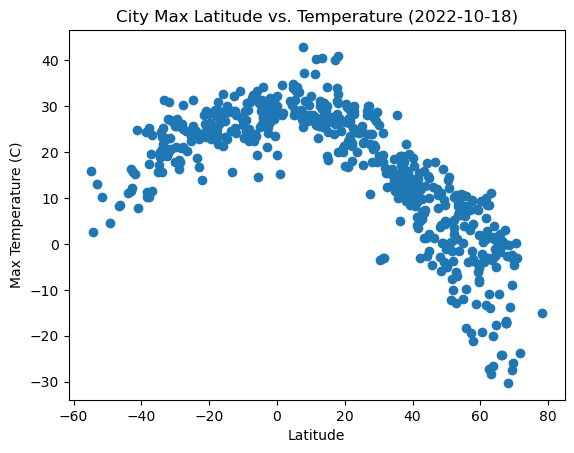

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

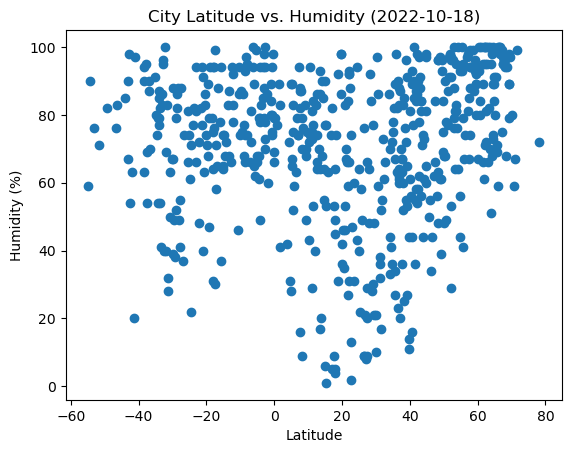

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

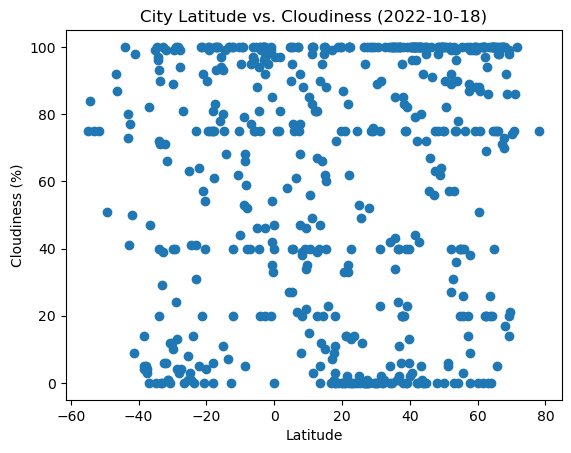

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

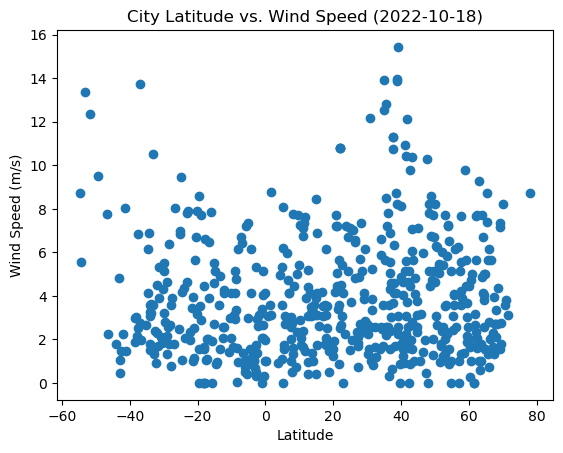

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(), y_values.min()),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,crane,31.3974,-102.3501,17.78,17,2,5.25,US,1711641138
1,hawaiian paradise park,19.5933,-154.9731,20.02,98,100,1.54,US,1711641138
2,whitehorse,60.7161,-135.0538,0.43,80,75,1.03,CA,1711641138
7,floro,61.5996,5.0328,10.04,66,0,0.00,NO,1711641139
8,longyearbyen,78.2186,15.6401,-15.09,72,75,8.75,SJ,1711641140


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,24.60,74,63,6.97,PN,1711641138
4,puerto ayora,-0.7393,-90.3518,27.53,94,54,4.02,EC,1711641139
5,margaret river,-33.9500,115.0667,15.60,87,93,1.52,AU,1711641139
6,rio grande,-32.0350,-52.0986,27.06,69,99,4.49,BR,1711641060
10,soure,-0.7167,-48.5233,28.56,75,35,2.05,BR,1711641140


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8725663101134844


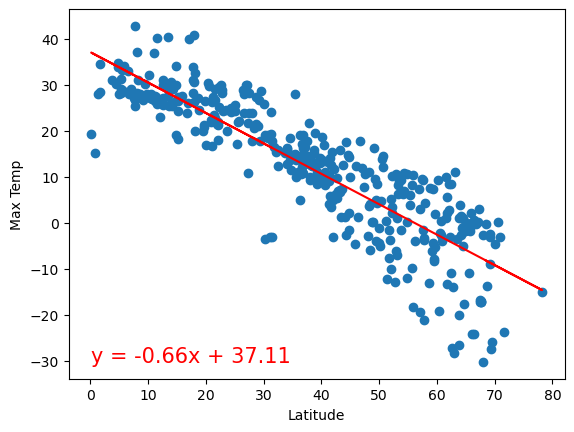

In [46]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
lin_regress(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6897046005111703


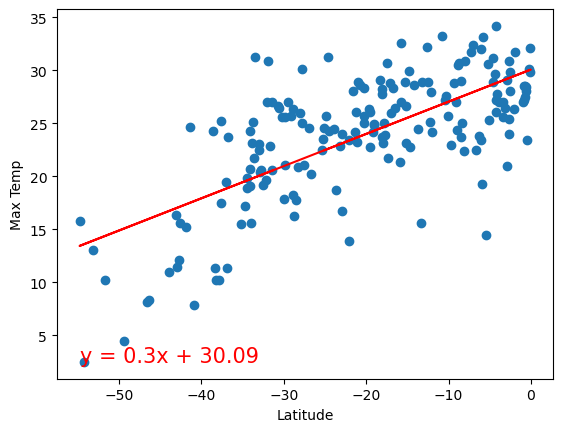

In [47]:
# Linear regression on Southern Hemisphere
x_values_1 = southern_hemi_df["Lat"]
y_values_1 = southern_hemi_df["Max Temp"]
lin_regress(x_values_1,y_values_1)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** Max temperature is very strongly associated with latitude in the northern hemisphere, such that as you travel further from the equator (latitude goes up), the max temperature gets colder. In the southern hemisphere, they are also strongly related, such that as you travel closer to the equator, the max temperature gets hotter.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3701423987423697


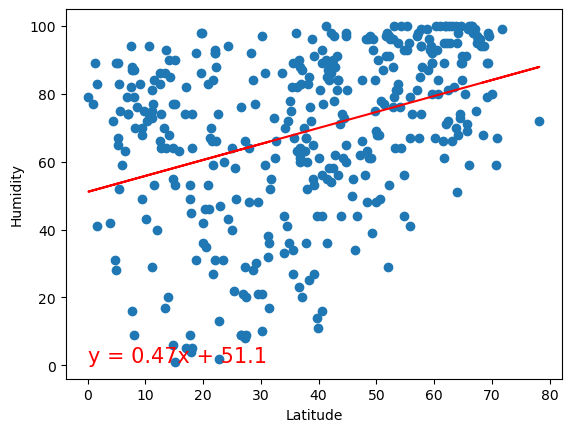

In [48]:
# Northern Hemisphere
x_values_3 = northern_hemi_df["Lat"]
y_values_3 = northern_hemi_df["Humidity"]
lin_regress(x_values_3,y_values_3)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.16326863472814798


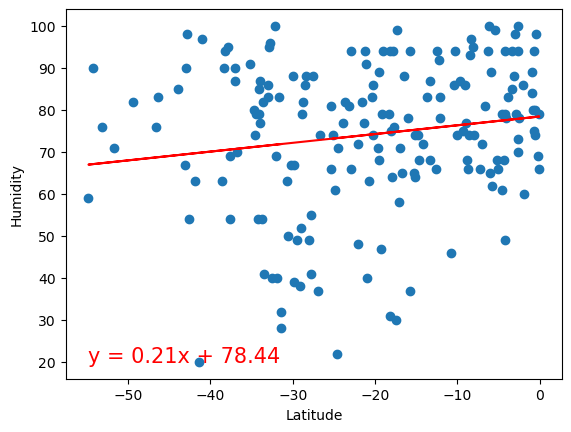

In [49]:
# Southern Hemisphere
x_values_4 = southern_hemi_df["Lat"]
y_values_4 = southern_hemi_df["Humidity"]
lin_regress(x_values_4,y_values_4)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Latitude and humidity are only weakly related in the northern hemisphere, such that are you travel further from the equator, humidity increases. In the southern hemisphere latitude and humidity are not related. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18804015506767105


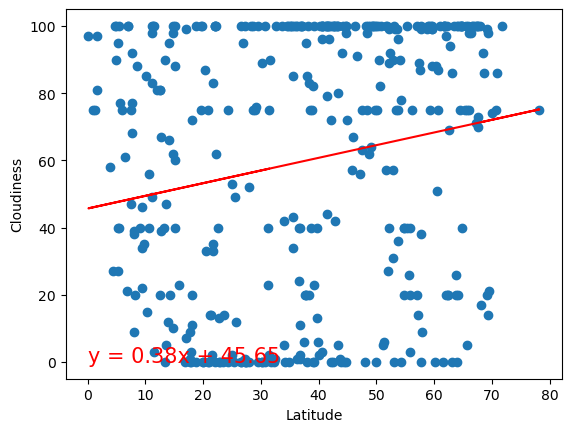

In [50]:
# Northern Hemisphere
x_values_5 = northern_hemi_df["Lat"]
y_values_5 = northern_hemi_df["Cloudiness"]
lin_regress(x_values_5,y_values_5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.21657073379377087


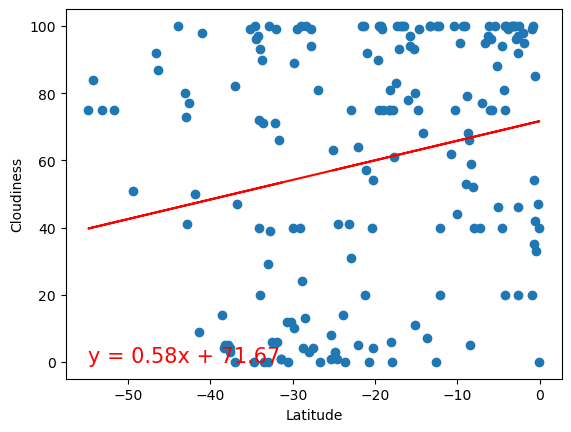

In [51]:
# Southern Hemisphere
x_values_6 = southern_hemi_df["Lat"]
y_values_6 = southern_hemi_df["Cloudiness"]
lin_regress(x_values_6,y_values_6)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The cloudiness and the latitude are not related in either the northern hemisphere or the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01636128759583229


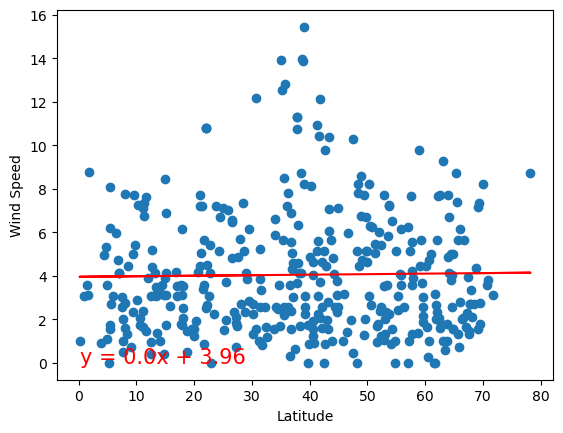

In [52]:
# Northern Hemisphere
x_values_7 = northern_hemi_df["Lat"]
y_values_7 = northern_hemi_df["Wind Speed"]
lin_regress(x_values_7,y_values_7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.3141464778539804


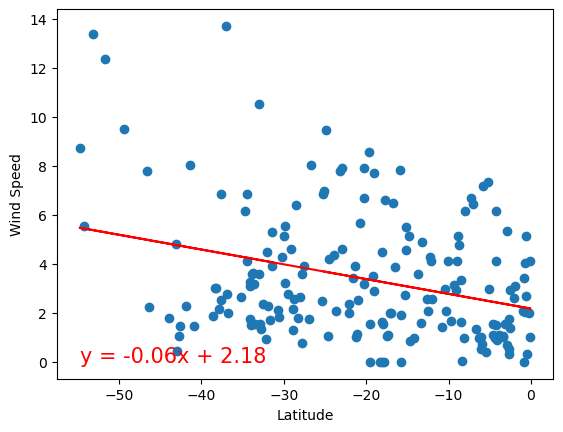

In [53]:
# Southern Hemisphere
x_values_8 = southern_hemi_df["Lat"]
y_values_8 = southern_hemi_df["Wind Speed"]
lin_regress(x_values_8,y_values_8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Latitude and wind speed are very weakly related in the southern hemisphere only, such that as you travel closer to the equator, wind speeds decrease. Latitude and wind speed were not related in the northern hemisphere.